**Notebook content:**
- Explore rest of columns which were not examined yet. 
- 

In [33]:
%reset -f 

In [34]:
import sys
import pandas as pd
import numpy as np
import datetime
from IPython.display import display

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.options.display.precision = 4

#import sys
np.set_printoptions(threshold=sys.maxsize) #- print the full NumPy array

from myDefs.defs import *

# visualization
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
%matplotlib inline


**Read events file**

In [35]:
file = DATA_PATH + "parseData1.csv"
df = pd.read_csv(file, sep=',')  #encoding='cp1255'

In [36]:
df.shape

(1683616, 17)

In [37]:
df.head()

,pid,admissionId,eventName,eventStartDate,eventEndDate,dValue,iValue,sValue,eventDesc,unitOfMeasure,orderNumber,organismId,eventCode,eventCodeOrg,eventType,eventTypeOrg,sourceName
0,1013265123,1840641,WBC,2018-02-15 10:58:00.0000000,2018-02-15 10:58:00.0000000,2,0,NaN,NaN,K/microL,nan,nan,26464-8,100109500,loinc,conv_lab_cham,[MIRROR_Chameleon].[Lab_Results]
1,1013265123,1840641,Alkaline Phosphatase -Blood,2018-02-15 10:25:00.0000000,2018-02-15 10:25:00.0000000,129,0,NaN,NaN,IU/l,nan,nan,77141-0,100184075,loinc,conv_lab_cham,[MIRROR_Chameleon].[Lab_Results]
2,1013265123,1840641,"Protein -Blood, total",2018-02-15 10:25:00.0000000,2018-02-15 10:25:00.0000000,4,0,NaN,NaN,g/dl,nan,nan,2885-2,100184155,loinc,conv_lab_cham,[MIRROR_Chameleon].[Lab_Results]
3,1013265123,1840641,Sodium -Blood,2018-02-15 10:25:00.0000000,2018-02-15 10:25:00.0000000,147,0,NaN,NaN,meq/l,nan,nan,2951-2,100184295,loinc,conv_lab_cham,[MIRROR_Chameleon].[Lab_Results]
4,1013265123,1840641,Urea -Blood,2018-02-15 10:25:00.0000000,2018-02-15 10:25:00.0000000,24,0,NaN,NaN,mg/dl,nan,nan,3091-6,100184520,loinc,conv_lab_cham,[MIRROR_Chameleon].[Lab_Results]


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683616 entries, 0 to 1683615
Data columns (total 17 columns):
pid               1683616 non-null float64
admissionId       1683616 non-null float64
eventName         1628158 non-null object
eventStartDate    1683616 non-null object
eventEndDate      1683616 non-null object
dValue            1556931 non-null float64
iValue            1556931 non-null float64
sValue            38602 non-null object
eventDesc         136875 non-null object
unitOfMeasure     966464 non-null object
orderNumber       16699 non-null float64
organismId        2126 non-null float64
eventCode         1683616 non-null object
eventCodeOrg      1534034 non-null object
eventType         1683616 non-null object
eventTypeOrg      1541809 non-null object
sourceName        1683577 non-null object
dtypes: float64(6), object(11)
memory usage: 218.4+ MB


## Parse Dates

Parse dates of events in events file.

In [39]:
#parse date of start event
df['eventStartDate'] = pd.to_datetime(df['eventStartDate'], format='%Y-%m-%d')

#parse date of end event
df['eventEndDate'] = pd.to_datetime(df['eventEndDate'], format='%Y-%m-%d')

## Sort by patient id and event start dates

In [40]:
df.sort_values(["pid", "eventStartDate"], inplace=True)

In [41]:
df.head()

,pid,admissionId,eventName,eventStartDate,eventEndDate,dValue,iValue,sValue,eventDesc,unitOfMeasure,orderNumber,organismId,eventCode,eventCodeOrg,eventType,eventTypeOrg,sourceName
1669916,1068368,1923584,סטורציה,2018-10-03 08:36:34.433,2018-10-03 08:36:34.433,100,0,NaN,NaN,NaN,nan,nan,113080007,13,snomed,conv_monitoring_parameter_cham,[MIRROR_Chameleon].[DeviceMonitor]
1669917,1068368,1923584,סטורציה,2018-10-03 08:36:34.433,2018-10-03 08:36:34.433,99,0,NaN,NaN,NaN,nan,nan,113080007,13,snomed,conv_monitoring_parameter_cham,[MIRROR_Chameleon].[DeviceMonitor]
1669918,1068368,1923584,לחץ סיסטולי,2018-10-03 08:36:34.467,2018-10-03 08:36:34.467,159,0,NaN,NaN,NaN,nan,nan,271649006,23,snomed,conv_monitoring_parameter_cham,[MIRROR_Chameleon].[DeviceMonitor]
1669919,1068368,1923584,לחץ סיסטולי,2018-10-03 08:36:34.467,2018-10-03 08:36:34.467,140,0,NaN,NaN,NaN,nan,nan,271649006,23,snomed,conv_monitoring_parameter_cham,[MIRROR_Chameleon].[DeviceMonitor]
1669920,1068368,1923584,לחץ דיאסטולי,2018-10-03 08:36:34.497,2018-10-03 08:36:34.497,68,0,NaN,NaN,NaN,nan,nan,271650006,24,snomed,conv_monitoring_parameter_cham,[MIRROR_Chameleon].[DeviceMonitor]


# Quick view on rest of the columns

### Column pid

**pid**: annonimized patient identification. There are **680** patietns.

In [44]:
df["pid"].nunique()

680

Number of rows per patient. Sizes are between 76 to 77,817.

In [45]:
sizes = df.groupby("pid").size().sort_values()
sizes

pid
421743715       76
719132417       81
303664833      106
221320915      115
624783512      144
             ...  
669777467    34017
532578604    35086
788959348    36265
621138515    67574
11339133     77817
Length: 680, dtype: int64

Text(0, 0.5, 'Count')

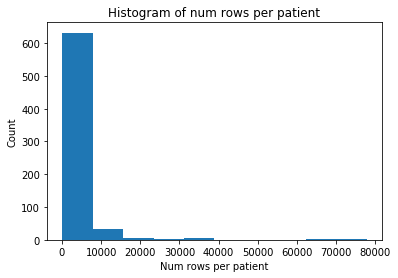

In [46]:
sizes.hist(grid=False, bins=10)
plt.title('Histogram of num rows per patient')
plt.xlabel('Num rows per patient')
plt.ylabel('Count')

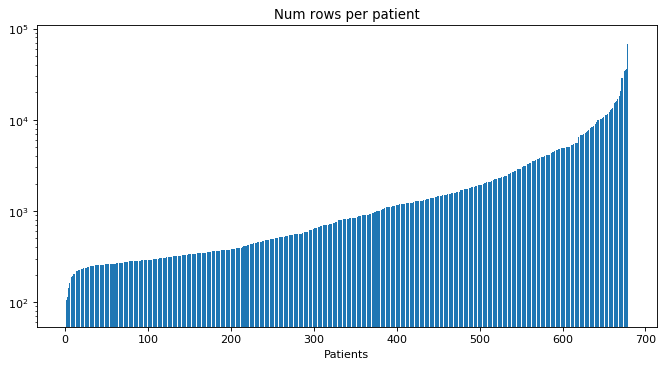

In [47]:
figure(num=None, figsize=(10, 5), dpi=80)

plt.bar(range(sizes.shape[0]), sizes.values, align='center')
plt.xlabel('Patients')
plt.title('Num rows per patient')
plt.yscale('log')

### Column admissionId

**admissionId**: Anonymized admission identification.

In [49]:
df["admissionId"].nunique()

1405

There are 382 patients with 1 addmission ID, 144 patients with 2 addmission IDs, etc. There are patients with more than 10 addmission IDs.

In [50]:
t = df.groupby(["pid", "admissionId"]).size().groupby(level=0).size()
t = t.value_counts().sort_index().to_frame(name= "count")
t.index.name = "# admissionIDs"
t

,count
# admissionIDs,
1,382
2,144
3,57
4,32
5,25
6,16
7,11
8,2
9,6


In [51]:
#get patient with 18 admission IDs
df.groupby(["pid", "admissionId"]).size().groupby(level=0).size().idxmax()
patient18_admissions = df[df["pid"]==1021872115]

### Column eventCode

**eventCode**: Not clear what is this code. 

In [52]:
df["eventCode"].head()

1669916    113080007
1669917    113080007
1669918    271649006
1669919    271649006
1669920    271650006
Name: eventCode, dtype: object

In [53]:
df["eventCode"].value_counts()

271650006    153083
364075005    120050
113080007    111170
86290005      79824
271649006     69238
              ...  
5390-0            1
51387008          1
14766002          1
302215000         1
68975-2           1
Name: eventCode, Length: 1106, dtype: int64

### Column eventCodeOrg

**eventCodeOrg**: Original code in the hospital source systems.

Not all 168,250 values which are not numeric, such as "LAPAROSCOPIC" and "ASA" strings.

In [54]:
df["eventCodeOrg"].value_counts() 

3            82326
2            82194
13           66636
1            40275
4704         36653
             ...  
118709623        1
50.3             1
17854            1
8                1
19745            1
Name: eventCodeOrg, Length: 1505, dtype: int64

In [55]:
df["eventCodeOrg"].dtypes

dtype('O')

In [56]:
idx = pd.to_numeric(df["eventCodeOrg"], errors='coerce').isna()
print(idx.sum())
df[idx]["eventCodeOrg"].drop_duplicates();

168250


### Column eventType

There are 5 event types.

In [57]:
df["eventType"].value_counts()

snomed          1025183
loinc            548244
rxnorm            66058
internal          39553
mdm-doc-type       4578
Name: eventType, dtype: int64

### Column eventTypeOrg

In [58]:
df["eventTypeOrg"].value_counts()

conv_lab_cham                       528095
conv_monitoring_parameter_cham      502250
conv_monitoring_parameter_icu       378434
conv_medicine_cham                   59239
conv_medicine_icu                    35675
conv_device_type_cham                12110
mdm-doc-type                          7616
conv_catheter_cham                    5106
conv_diag_cham                        3848
conv_proc_cham                        2955
conv_description_cham                 1788
conv_diag_icu                         1246
conv_urgency_of_surgey_cham            903
conv_approach_cham                     897
Conv_lab_cham                          459
conv_device_insert_location_cham       307
conv_asa_cham                          303
Conv_monitoring_parameter_cham         217
conv_type_of_surgey_cham               199
ge                                     153
Conv_Device_Type_Cham                    5
Conv_Catheter_cham                       2
Conv_Approach_cham                       1
conv_Urgenc

### Column eventDesc

**eventDesc**: Description of the event.

There are 13,6875 events with a description. There are 215 unique values.  

In [59]:
df["eventDesc"].count()

136875

In [60]:
df["eventDesc"].value_counts().reset_index(name='count')

,index,count
0,adequate mentation,27061
1,NTT,14583
2,localized pain,10671
3,central line insert,9262
4,deep incision absces,8140
...,...,...
210,רקע משפחתי,1
211,אנמנזה רפואית,1
212,infiltrate right lower,1
213,סיבת אשפוז מפורטת סיעודית,1


### Column eventTypeOrg

**sourceName**: Indicates the source for the event.

In [61]:
df["sourceName"].nunique()

186

In [62]:
df["sourceName"].value_counts().reset_index(name='count').head()

,index,count
0,[MIRROR_Chameleon].[Lab_Results],511855
1,[MIRROR_Sheba_ICU].[MVQSignalsView],375644
2,[MIRROR_Chameleon].[DeviceMonitor],266216
3,[MIRROR_Chameleon].[Execution],236251
4,[MIRROR_Chameleon].[MedExecutionMedicine],59239


### Column unitOfMeasure

In [63]:
df["unitOfMeasure"].value_counts()

%                      134894
mmHg                   105354
K/microL                90623
mg/dl                   82828
None                    52471
g/dl                    52165
insp/min                50002
IU/l                    47333
meq/l                   39727
C                       38497
bpm                     36653
mg                      31932
ml                      28483
cmH2O                   27693
F                       22793
fL                      21125
mbar                    18433
cc(ml)                  17153
mmol/l                  11377
M/microL                10444
pg                      10441
mOsm/KgH2O              10104
g/dL                     4887
g%                       3705
gram                     3209
gr                       2959
sec.                     2932
mcg                      1409
ms                        956
BPM                       942
units                     877
/HPF                      468
cc                        453
g         

### Column orderNumber

**Microbiology order number**: Microbiology order number.

In [64]:
df[["orderNumber"]].dropna()

,orderNumber
1668341,1135897
1641764,1138905
1641765,1138905
1675971,1139554
1675972,1139554
...,...
1267962,1065899
1273912,1065899
1273913,1065899
1277129,1065899


In [65]:
df["orderNumber"].nunique()

4097

Number of order numbers per patient:

In [66]:
df.groupby("pid")["orderNumber"].nunique().sort_values()

pid
430694706      0
380920756      0
379980757      0
377788759      0
375382761      0
            ... 
532578604     65
11339133      81
621138515     83
104681290     88
788959348    150
Name: orderNumber, Length: 680, dtype: int64

There are 280 patients with more than one order number. 

In [67]:
df[df.groupby("pid")["orderNumber"].transform('nunique')>1].groupby("pid").ngroups

280

### Column organismId

**organismId**: Snomed code of the identified organism in a microbiology test.

In [68]:
df["organismId"].count()

2126

In [69]:
df["organismId"].nunique()

61

In [70]:
df["organismId"].value_counts()

112283007    414
56415008     295
78065002     205
90272000     184
52499004     143
3092008       94
243301005     87
60875001      87
53326005      47
73457008      44
44304009      42
61302002      39
40347003      37
44827007      34
55247009      33
91288006      23
40886007      21
414102007     19
113697002     18
43492007      15
47885008      14
243416009     13
444877006     12
62093005      11
243386003     11
114129000     11
43690008      11
14385002      10
8191000       10
83452006       9
62592009       8
87002009       8
33562003       8
372377007      7
9861002        7
103494005      6
115952006      6
84408007       6
127537007      6
76995003       6
33522002       5
115125000      5
30949009       4
114264004      4
7757008        4
8331005        4
413931002      4
87172008       3
76199005       3
80166006       3
83514008       3
115158009      3
66872005       3
116197008      3
14196002       3
243398008      2
39473003       2
48299003       2
243397003     